# Wine Quality Dataset - Precise GP

In [1]:
import matplotlib.pyplot as plt # 3.6
import numpy as np # 1.22.4
import tensorflow as tf # 2.11.0
import gpflow # 2.7.0
import pandas as pd
import tensorflow_probability as tfp
from tensorflow import keras
import seaborn as sns
import torch
from tensorflow.python.ops.numpy_ops import np_config
from LambdaRBF import LambdaRBF
from utils import *
import pandas as pd
import os
np_config.enable_numpy_behavior()
plt.rcParams["figure.figsize"] = (8, 6)
plt.style.use("ggplot")
print('tensorflow ', tf.__version__) 
print('pytorch ', torch.__version__) 
print('numpy ', np.__version__) 
print('gpflow ', gpflow.__version__) 
print('pandas ', pd.__version__) 
tf.random.set_seed(42)
np.random.seed(42)

2023-04-09 18:57:18.426226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


tensorflow  2.11.0
pytorch  1.13.1
numpy  1.22.4
gpflow  2.7.0
pandas  1.5.3


## Import the Wine Dataset

In [2]:
def csv_to_pth(name, csv_path, pth_path):
    def dataframe_to_arrays(df):
        df_ = df.copy(deep=True)
        X = np.atleast_2d(df_[input_cols].to_numpy())
        Y = np.atleast_2d(df_[output_cols].to_numpy().reshape(-1,1))
        return X, Y
    dataframe_raw = pd.read_csv(csv_path)
    dataframe_raw.head()
    input_cols = list(dataframe_raw.columns)[:-1]
    output_cols = list(dataframe_raw.columns)[-1]
    X, Y = dataframe_to_arrays(dataframe_raw)
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    inputs = torch.tensor(X, dtype=torch.float64)
    targets = torch.tensor(Y, dtype=torch.float64)
    torch.save([inputs, targets], pth_path + name + '.pth')
    return input_cols, output_cols
input_cols, output_cols = csv_to_pth("wine", "data/winequality-red.csv", "data/")

In [19]:
X, Y = create_dataset('boston', 42, False)
Y_mean, Y_std = Y.mean(0), Y.std(0) + 1e-9
Y = (Y - Y_mean) / Y_std

In [20]:
model_GPR_LRBF, Lambda = train_GPR_LRBF_model(X_train=X, Y_train=Y, reg=1, prior=None, iprint=False)

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.Lambda_L,Parameter,Identity,,True,"(91,)",float64,"[0.27735, 0., 0...."
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


<AxesSubplot: >

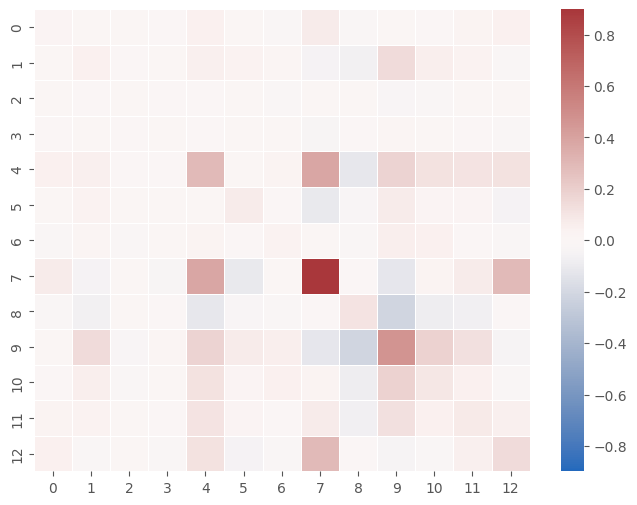

In [22]:
min = np.min(Lambda)
max = np.max(Lambda)
center = (min+max)/2
sns.heatmap(Lambda, annot=False, cmap='vlag', vmax=max, vmin=-max, center=0, linewidth=.5)

In [23]:
def sparsity_degree(L, tol=10e-2):
    return (np.absolute(L.numpy()) < tol).sum() / Lambda.shape[0]**2

In [24]:
sparsity_degree(Lambda, tol=10e-2)

0.8165680473372781

In [48]:
sparsity_degree(tf.linalg.inv(Lambda))

0.0